# Rogun HPP - Setup Basemaps

## description of procedure

This procedure prepares Project Basemaps from CAD topography and project layout data, and is intended to provide necessary input to the Hydropower Waterways Decision Support System (Waterways DSS), along with the Alignments module:
- basemaps for feasibilty and siting analysis
- platform for collecting and visualizing available site information, with same coordinate system, at same scale and at suitable resolution.

The Setup Baseamp procedure reads in a DXF file from CAD, which must contain topography as either a TIN, contours or points.

Expected outputs of Setup Basemaps procedure:
* DEM raster suitable for waterways DSS alignment interrogation 
* terrain relief map 
* hillslope map
* project layout map
* hydrologic map with watersheds and watercourses
* satellite DEM map for cross-checking project topography
* reporting of topographic inputs, outputs, differences between topographic inputs and processing

Required inputs for Setup Basemaps procedure:
* CAD DWG with topography as  (contours, TIN or points) as ./data/in
* CAD topography as DXF (contours, TIN or points) using e.g. Sketchup as ./data/in
* project layout (PDF) in ./data/in/images
* project name (which corresponds to project folder) as Jupyter input
* project coordinate system (or assumption as e.g. pseudo Mercator) as Jupyter input
* coordinate bounds (grass region), typically same as bound of suitably cropped project layout, as Jupyter input
* layer(s) with topographic data -> by inspection of imported DXF, as Jupyter input
* layer(s) with stream data (if applicable) -> by inspection of imported DXF, as Jupyter input
* project layout (PNG) suitably cropped and rotated such that north is y-axis of layout, in ./data/in/images

Using procedure in a Jupyter Notebook Basemap template:
1. call grass setup from API
2. define basic input data
3. report basic input data
4. add required input data from report (layers with topographic and stream data(if applicable))
5. call Setup Basemaps procedure from API
6. display Basemaps
7. report on Basemaps
8. export Basemaps as PNG (e.g. for Google Maps, plotly)

Preparation of DXF from CAD DWG containing topogrpay
1. check that topography has 'z' attributed to topographic entities
2. identify layer(s) containing topography and streams (if available)
3. export topography and stream layers as DXF

Preparation of PNG from Project layout PDF
1. Check project layout PDF for correctness and completeness
2. Take screenshot (PNG) of project layout PDF (works best for me)
3. Upload screenshot PNG to jk-2-gce-gis project data folder ./data/in/images
4. View PNG with qgis (add raster layer) and determine required rotation (see rotation field at bottom)
5. Use 'convert -rotate "-nn.n" screenshot.png screenshot_r.png’ to rotate image 
6. Download rotated PNG  
7. Crop PNG image ‘by eye’ using image viewer and record coordinate bounds
8. Upload cropped screenshot PNG to jk-2-gce-gis project data folder
9. Run grass procedure ‘project layout map using recorded coordinate bounds
10. Make fine adjustments of coordinate bounds using r.region 

Output grass raster layers:
* 'project'/grassdata/Permeanent/cells/terrain_dem
* 'project'/grassdata/Permeanent/cells/terrain_relief
* 'project'/grassdata/Permeanent/cells/terrain_hillslope
* 'project'/grassdata/Permeanent/cells/terrain_hydrology
* 'project'/grassdata/Permeanent/cells/rpoject_layout

Output grass raster tiff data files:
 * to be added

Output grass image png data files:
* 'project'/data/out/image/*.png


## grass setup

In [1]:
# import Basemap API
from basemap import *
from basemap import Basemap

## project setup

In [2]:
# define required user input data for project
project = 'RogunHPP'
crs = 'EPSG:3857'  #WGS84 Pseudo Mercator
#n,s,e,w = 24797, 20796, 28600, 25597
n,s,e,w = 25020, 20880, 28490, 26040
res = 2  #10  #sets raster resolution

In [3]:
# instantiate Basemap instance for project
map = Basemap(project)


# fix this documentation & state which method(s) it applies to !!!                                          !!!
# all grass functions (except map) ???
#        dbg=0 in function parameters -> show error messages only
# and dbg=0 doesn't work for "map.read_grass('d.vect', ..."                                                 Fix

project: RogunHPP

 
basemapy.py - Basemap Module
    prepares a set of raster basemaps for a project
       basemaps are suitable for geospatial querying from alignments
       basemaps are suitable for importing as layers into qgis

Usage:
    1. map = Basemap(project)                              instantiate a project basemap
    2. map.inspect_dxf(project_dir, topogDXF)              examine DXF data containing topography
    3. map.import_dxf(project_dir, topogDXF, layers_dxf)   import DXF data layer containing topography
    4. map.rasterize_vect_lines                            rasterize vector data - sparse data, irregular bounds
       OR map.rasterize_vect_faces                                               - dense date, regular bounds
       OR map.rasterize_vect_using_points                                        - sparse data, regular bounds
    5. map.hillslope()                                     create a hillslope raster map
    6. map.relief_map()                      

In [4]:
# define required input data files for project
#topogDXF='data/in/Topography2m_R5_reduced_5m.dxf'
topogDXF='data/in/Topografy2m_R5full.dxf'
layoutPDF = 'data/in/images/RogunHPP.Layout_c_r.png'

In [5]:
# open mapset for project (create mapset if it doesn't exist)
#  can be moved to API class constructor if parameters are passed to 'map' at instantiation            #JK ToDo
mapset_loc, rcfile = map.grass_mapset(crs)

grass -c EPSG:3857 -e /home/kaelin_joseph/projects/RogunHPP//grassdata/RogunHPP
The location RogunHPP already exists


In [6]:
# set grass region for project
#  can be moved to API class constructor if parameters are passed to 'map' at instantiation            #JK ToDo
g.region(n=n,s=s,e=e,w=w, res=res)

Module('g.region')

In [7]:
# report grass setup
print('\n' 'grass environment:')
print(grass.gisenv())

# report grass coordinate system
print('\n' 'coordinate system:')
print(map.read_grass('g.proj', flags = 'jf'))

# report grass region
print('\n' 'grass mapset region:')
print(g.region(flags='p',stdout_=PIPE).outputs.stdout.decode())


grass environment:
{'MAPSET': 'PERMANENT', 'GISDBASE': '/home/kaelin_joseph/projects/RogunHPP//grassdata', 'LOCATION_NAME': 'RogunHPP'}

coordinate system:
('+proj=merc +lat_ts=0.0 +lon_0=0.0 +x_0=0.0 +y_0=0 +k=1.0 +no_defs +a=6378137 +rf=298.257223563 +towgs84=0.000,0.000,0.000 +to_meter=1\n', '')

grass mapset region:
projection: 99 (Mercator)
zone:       0
datum:      wgs84
ellipsoid:  wgs84
north:      25020
south:      20880
west:       26040
east:       28490
nsres:      2
ewres:      2
rows:       2070
cols:       1225
cells:      2535750



## read in DXF data file containing topogaphy

In [8]:
# inspect layers in DXF data file to be read in
map.inspect_dxf(topogDXF)

Topografy2m_R5full.dxf does not exist


In [9]:
# import topography data from DXF data file 
# define layers to be used to extract topography
layers_dxf = 'stl'
map.import_dxf(topogDXF, layers_dxf, dbg=0)

/home/kaelin_joseph/projects/RogunHPP/Topografy2m_R5full.dxf does not exist
import_dxf completed


In [10]:
# report of imported DXF
#  comment out individual reporting as desired

# report imported DXF layers
print(map.read_grass("v.info", map='topog_vect', layer=layers_dxf, verbose=True)[0].decode()) 

# report entities in imported DXF layers
out = map.read_grass("v.db.select", map='topog_vect')[0].splitlines()
for line in range(0,5):
    print(out[line])

# report categories in imported DXF layers
print('\n')
print(map.read_grass("v.category", input='topog_vect', layer='-1', option='report', verbose=True)[0].decode()) 

# report coordinatesin imported DXF layers
#   adjust range as desired
out = map.read_grass("v.report", map='topog_vect', layer='-1', option='coor', verbose=True)[0].splitlines()
for line in range(0,1):
    print(out[line])

# report on attributes stored in grass sqlite database
print('\n')
print(map.read_grass("v.db.connect", map='topog_vect', flags='c', verbose=True)[0].decode()) 

 +----------------------------------------------------------------------------+
 | Name:            topog_vect                                                |
 | Mapset:          PERMANENT                                                 |
 | Location:        RogunHPP                                                  |
 | Database:        /home/kaelin_joseph/projects/RogunHPP//grassdata          |
 | Title:           topog_vect                                                |
 | Map scale:       1:2400                                                    |
 | Name of creator: kaelin_joseph                                             |
 | Organization:    GRASS Development Team                                    |
 | Source date:                                                               |
 | Timestamp (first layer): none                                              |
 |----------------------------------------------------------------------------|
 | Map format:      native              

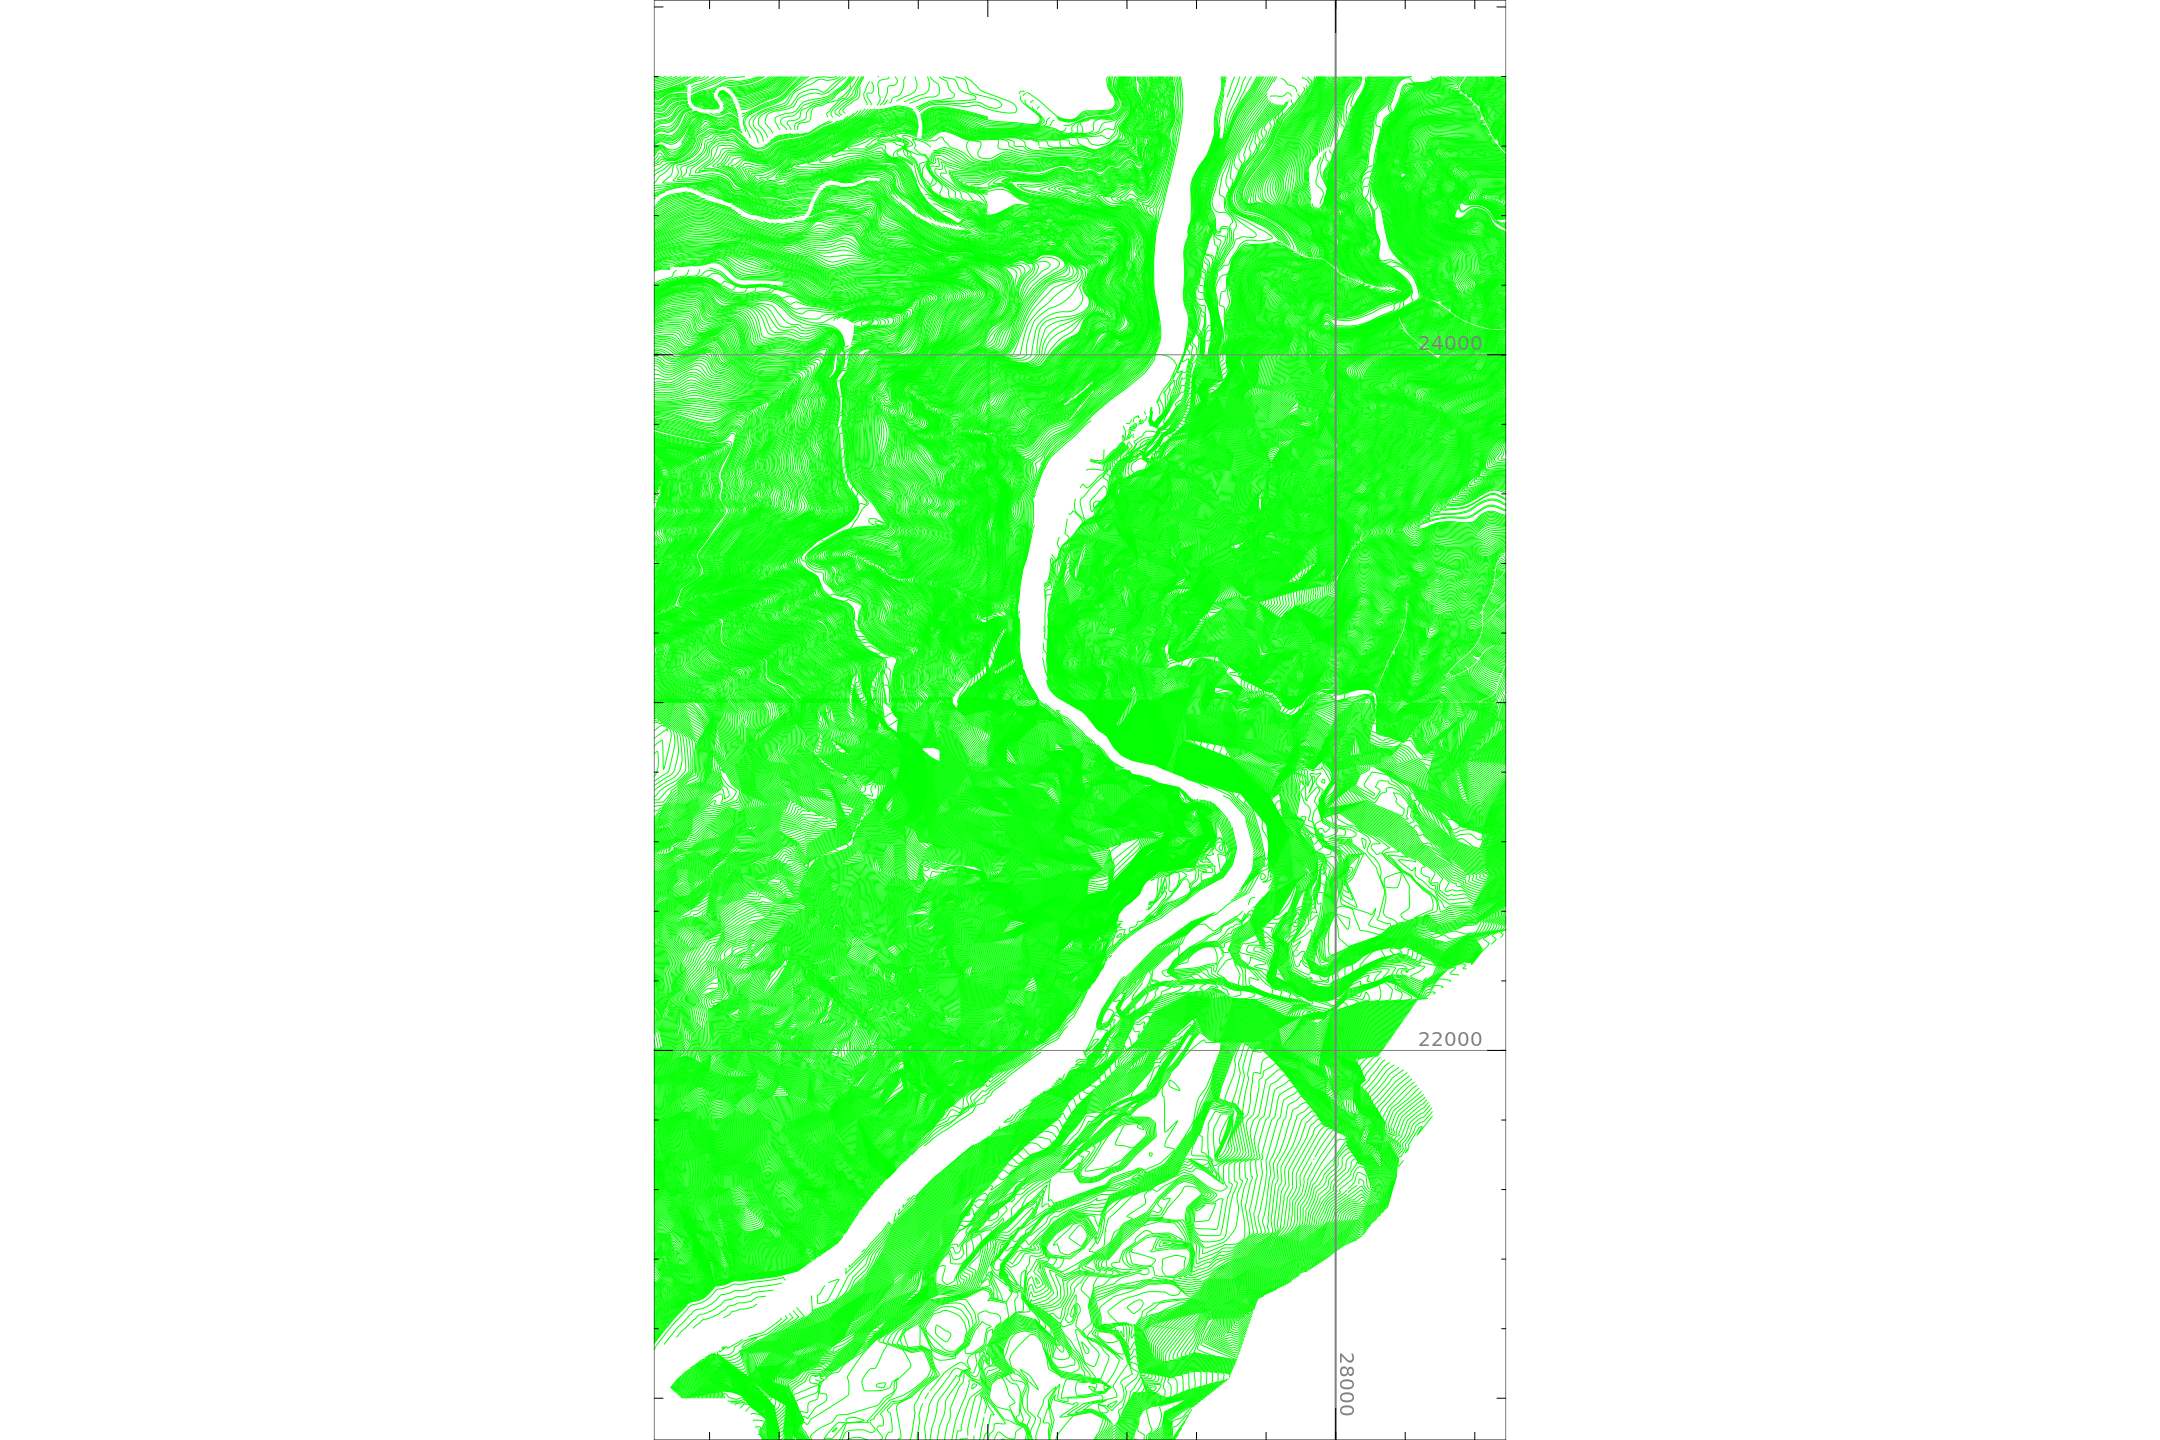

In [11]:
# display topography vector data
output_image = 'data/out/images/topog_vect.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.vect", map='topog_vect', color='green')
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## convert vector data with DXF topography to raster DEM

In [12]:
# convert vector DXF data to raster DEM
# testing
#map.rasterize_vect_lines(dbg=1)          # ERROR
#map.rasterize_vect_faces(dbg=1)          # NG - sparse data
#map.rasterize_vect_using_points(npoints=12, power=2, dbg=1)    # OK
map.rasterize_vect_using_points(npoints=12, power=2, dbg=1)

         overwritten
   2   5   8  11  14  17  20  23  26  29  32  35  38  41  44  47  50  53  56  59  62  65  68  71  74  77  80  83  86  89  92  95  98 100
Building topology for vector map <topog_vect_points@PERMANENT>...
Registering primitives...
51551 primitives registered  400     500
51551 vertices registered
Building areas...
   0   2   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78  80  82  84  86  88  90  92  94  96  98 100
0 areas built
0 isles built
Attaching islands...
Attaching centroids...
   1   3   5   7   9  11  13  15  17  19  21  23  25  27  29  31  33  35  37  39  41  43  45  47  49  51  53  55  57  59  61  63  65  67  69  71  73  75  77  79  81  83  85  87  89  91  93  95  97  99 100
Number of nodes: 0
Number of primitives: 51551
Number of points: 51551
Number of lines: 0
Number of boundaries: 0
Number of centroids: 0
Number of areas: 0
Number of isles: 0
v.to.poi

In [13]:
# report of vector lines
#  comment out individual reporting as desired

# report imported DXF layers
print(map.read_grass("v.info", map='topog_vect_points', layer=layers_dxf, verbose=True)[0].decode()) 

# # report entities in imported DXF layers
# #   adjust range as desired
# out = map.read_grass("v.db.select", map='topog_vect_points')[0].splitlines()
# for line in range(0,5):
#     print(out[line])

# report categories in imported DXF layers
print('\n')
print(map.read_grass("v.category", input='topog_vect_points', layer='-1', option='report', verbose=True)[0].decode()) 

# report coordinatesin imported DXF layers
#   adjust range as desired
out = map.read_grass("v.report", map='topog_vect_points', layer='-1', option='coor', verbose=True)[0].splitlines()
for line in range(0,1):
    print(out[line])

# report on attributes stored in grass sqlite database
print('\n')
print(map.read_grass("v.db.connect", map='topog_vect_points', flags='c', verbose=True)[0].decode()) 

 +----------------------------------------------------------------------------+
 | Name:            topog_vect_points                                         |
 | Mapset:          PERMANENT                                                 |
 | Location:        RogunHPP                                                  |
 | Database:        /home/kaelin_joseph/projects/RogunHPP//grassdata          |
 | Title:           topog_vect                                                |
 | Map scale:       1:2400                                                    |
 | Name of creator: kaelin_joseph                                             |
 | Organization:    GRASS Development Team                                    |
 | Source date:                                                               |
 | Timestamp (first layer): none                                              |
 |----------------------------------------------------------------------------|
 | Map format:      native              

In [14]:
# report of raster DEM

print(map.read_grass("r.info", map='topog_rast_resamp')[0].decode()) 

print(map.read_grass("r.report", map='topog_rast_resamp', units='h,p', nsteps=10)[0].decode()) 

print(map.read_grass("r.univar", map='topog_rast_resamp')[0].decode()) 


 +----------------------------------------------------------------------------+
 | Map:      topog_rast_resamp              Date: Sat Sep  8 13:57:33 2018    |
 | Mapset:   PERMANENT                      Login of Creator: kaelin_joseph   |
 | Location: RogunHPP                                                         |
 | DataBase: /home/kaelin_joseph/projects/RogunHPP//grassdata                 |
 | Title:     ( topog_rast_resamp )                                           |
 | Timestamp: none                                                            |
 |----------------------------------------------------------------------------|
 |                                                                            |
 |   Type of Map:  raster               Number of Categories: 0               |
 |   Data Type:    DCELL                                                      |
 |   Rows:         2070                                                       |
 |   Columns:      1225                 

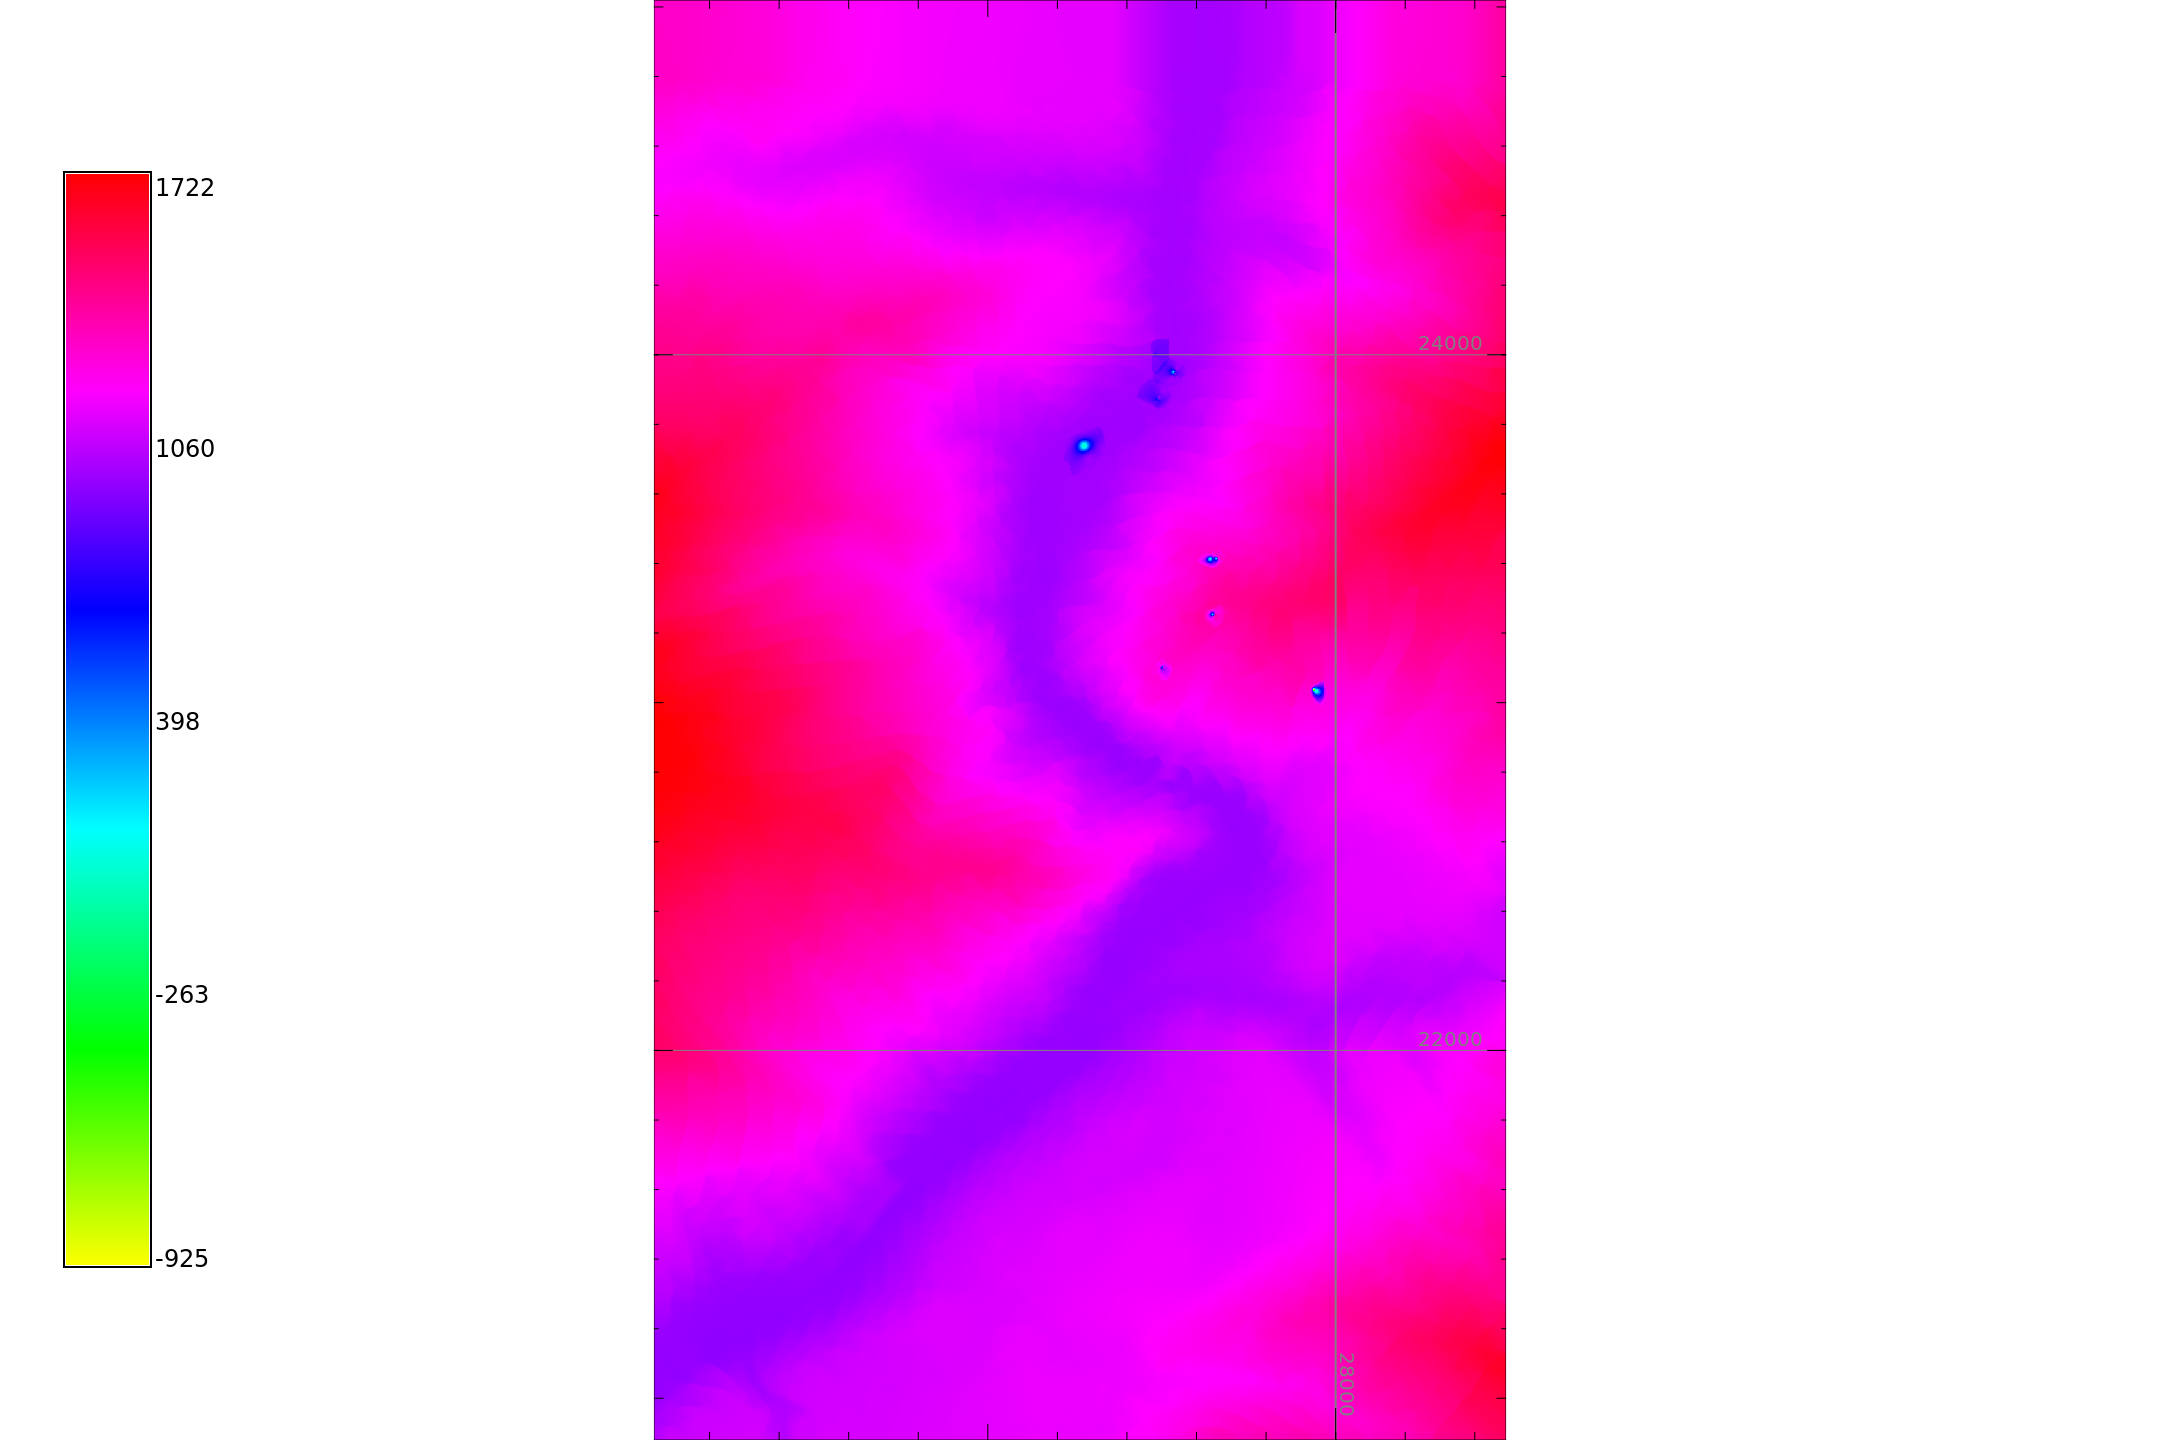

In [15]:
# display topography raster DEM
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_rast.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_rast_resamp', bgcolor='white', flags='n')
map.read_grass("d.legend", raster='topog_rast_resamp', fontsize='24')[1]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

In [16]:
# filter out bad data
##!r.mapcalc "topog_contours_rast_filtered_=if(topog_rast_resamp<900,null(),topog_rast_resamp)"
##!g.copy raster=topog_contours_rast_filtered_,topog_rast_resamp

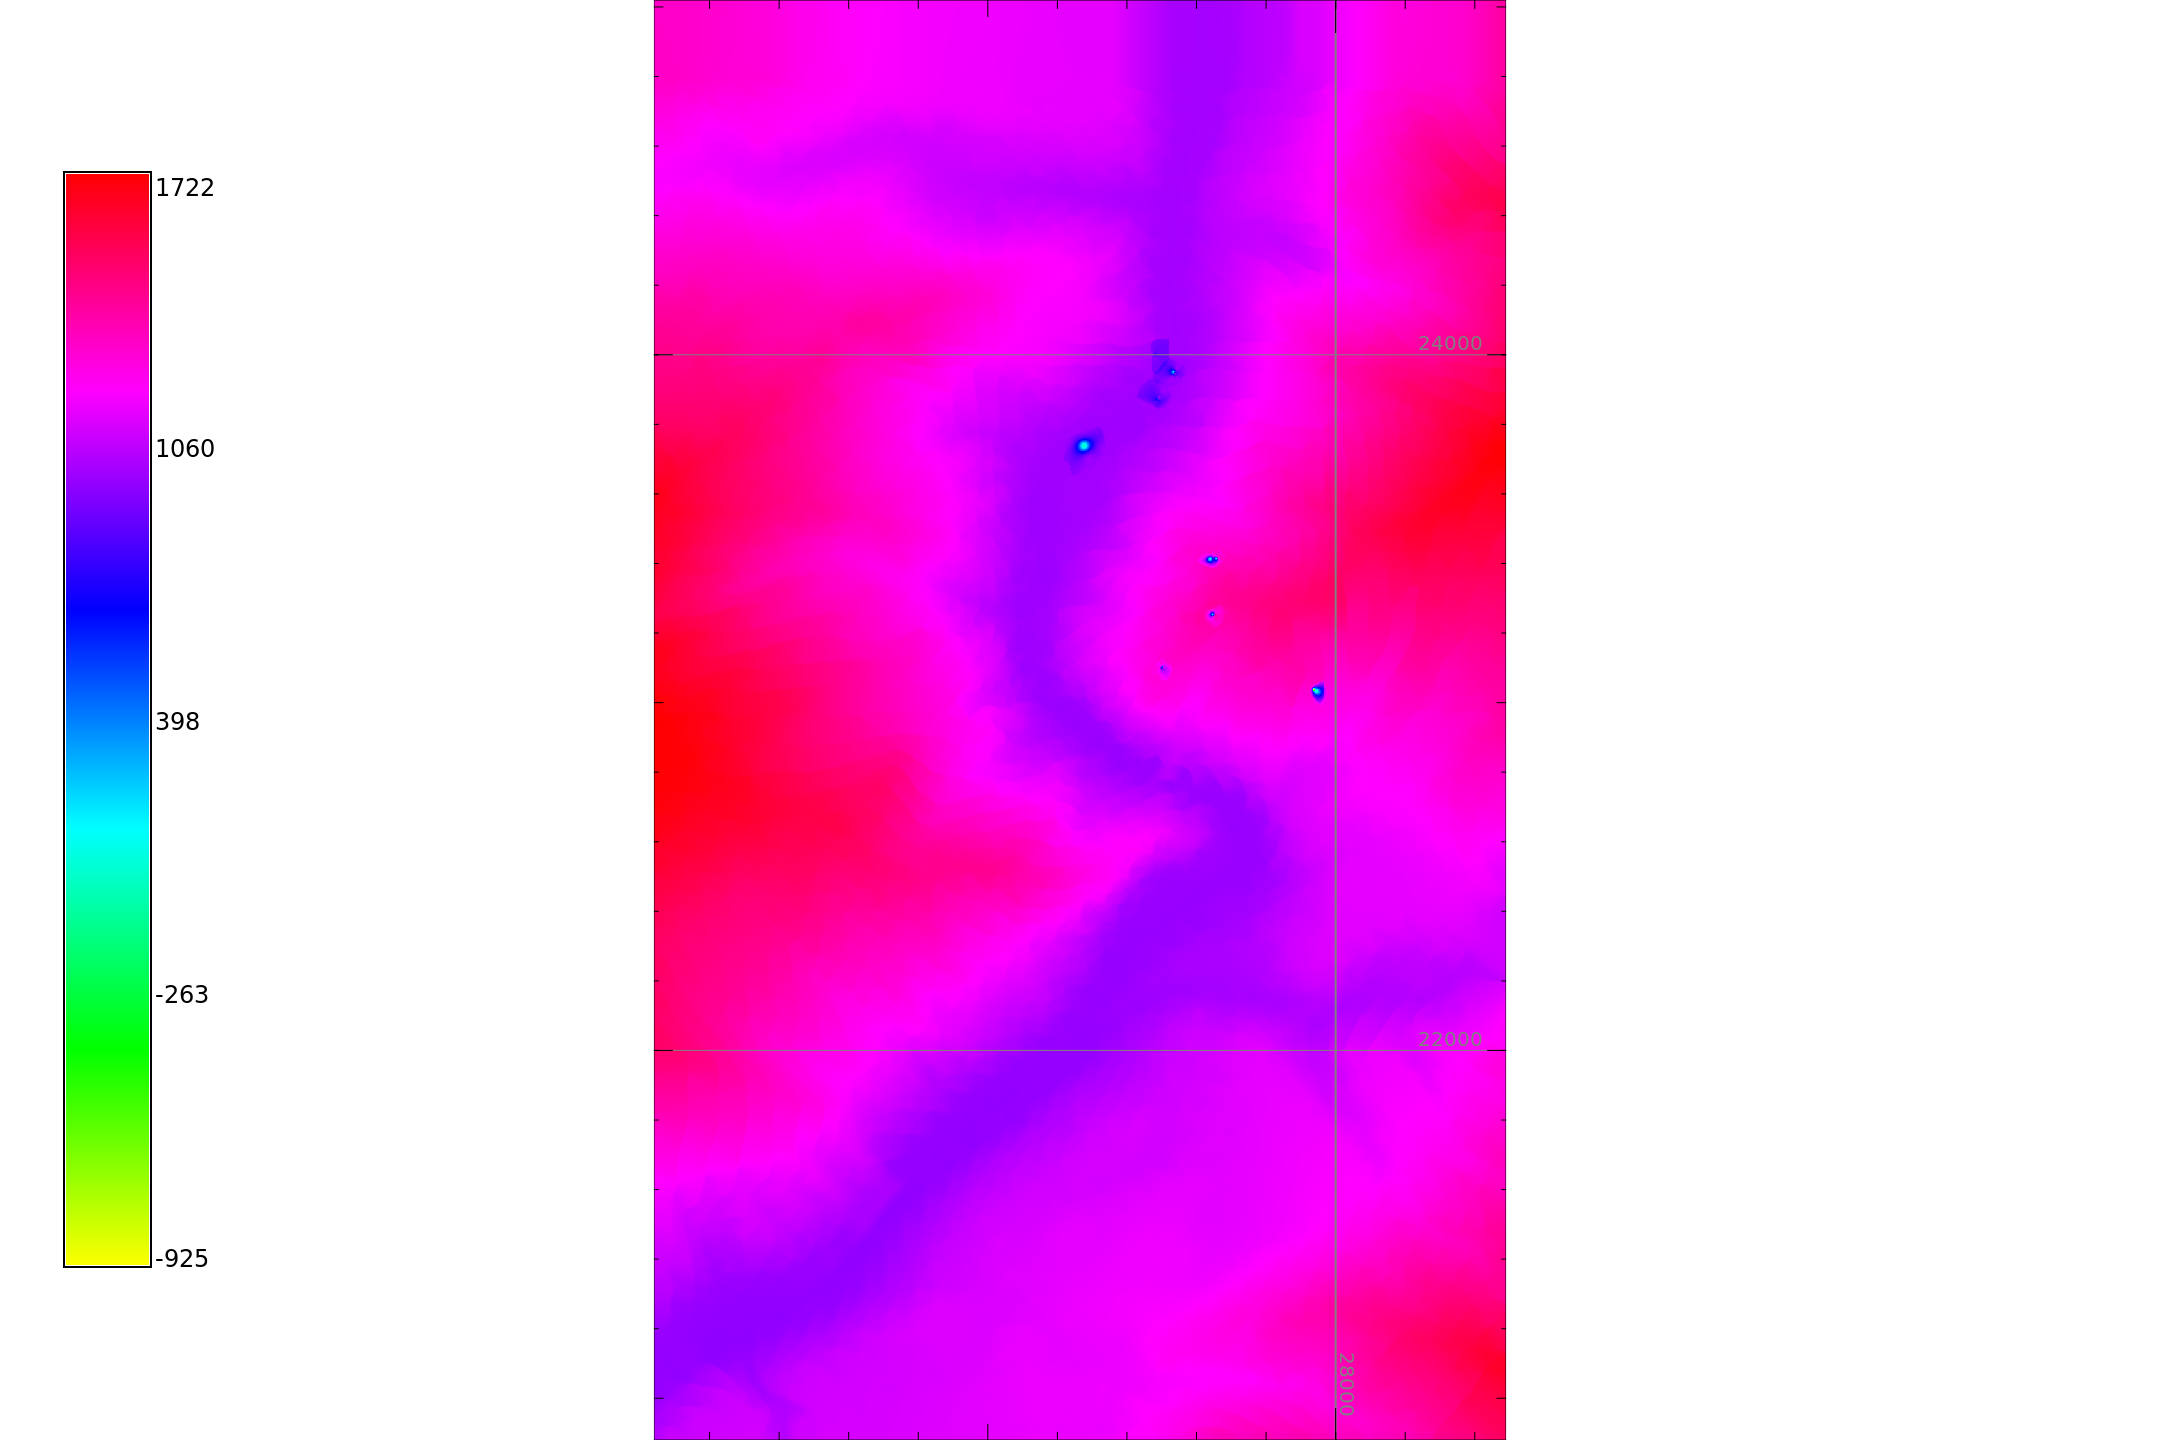

In [17]:
# display topography raster DEM
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_rast.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_rast_resamp', bgcolor='white', flags='n')
map.read_grass("d.legend", raster='topog_rast_resamp', fontsize='24')[1]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## hillslope map

In [18]:
# create a hillslope raster map from raster DEM
map.hillslope()


hillslope completed


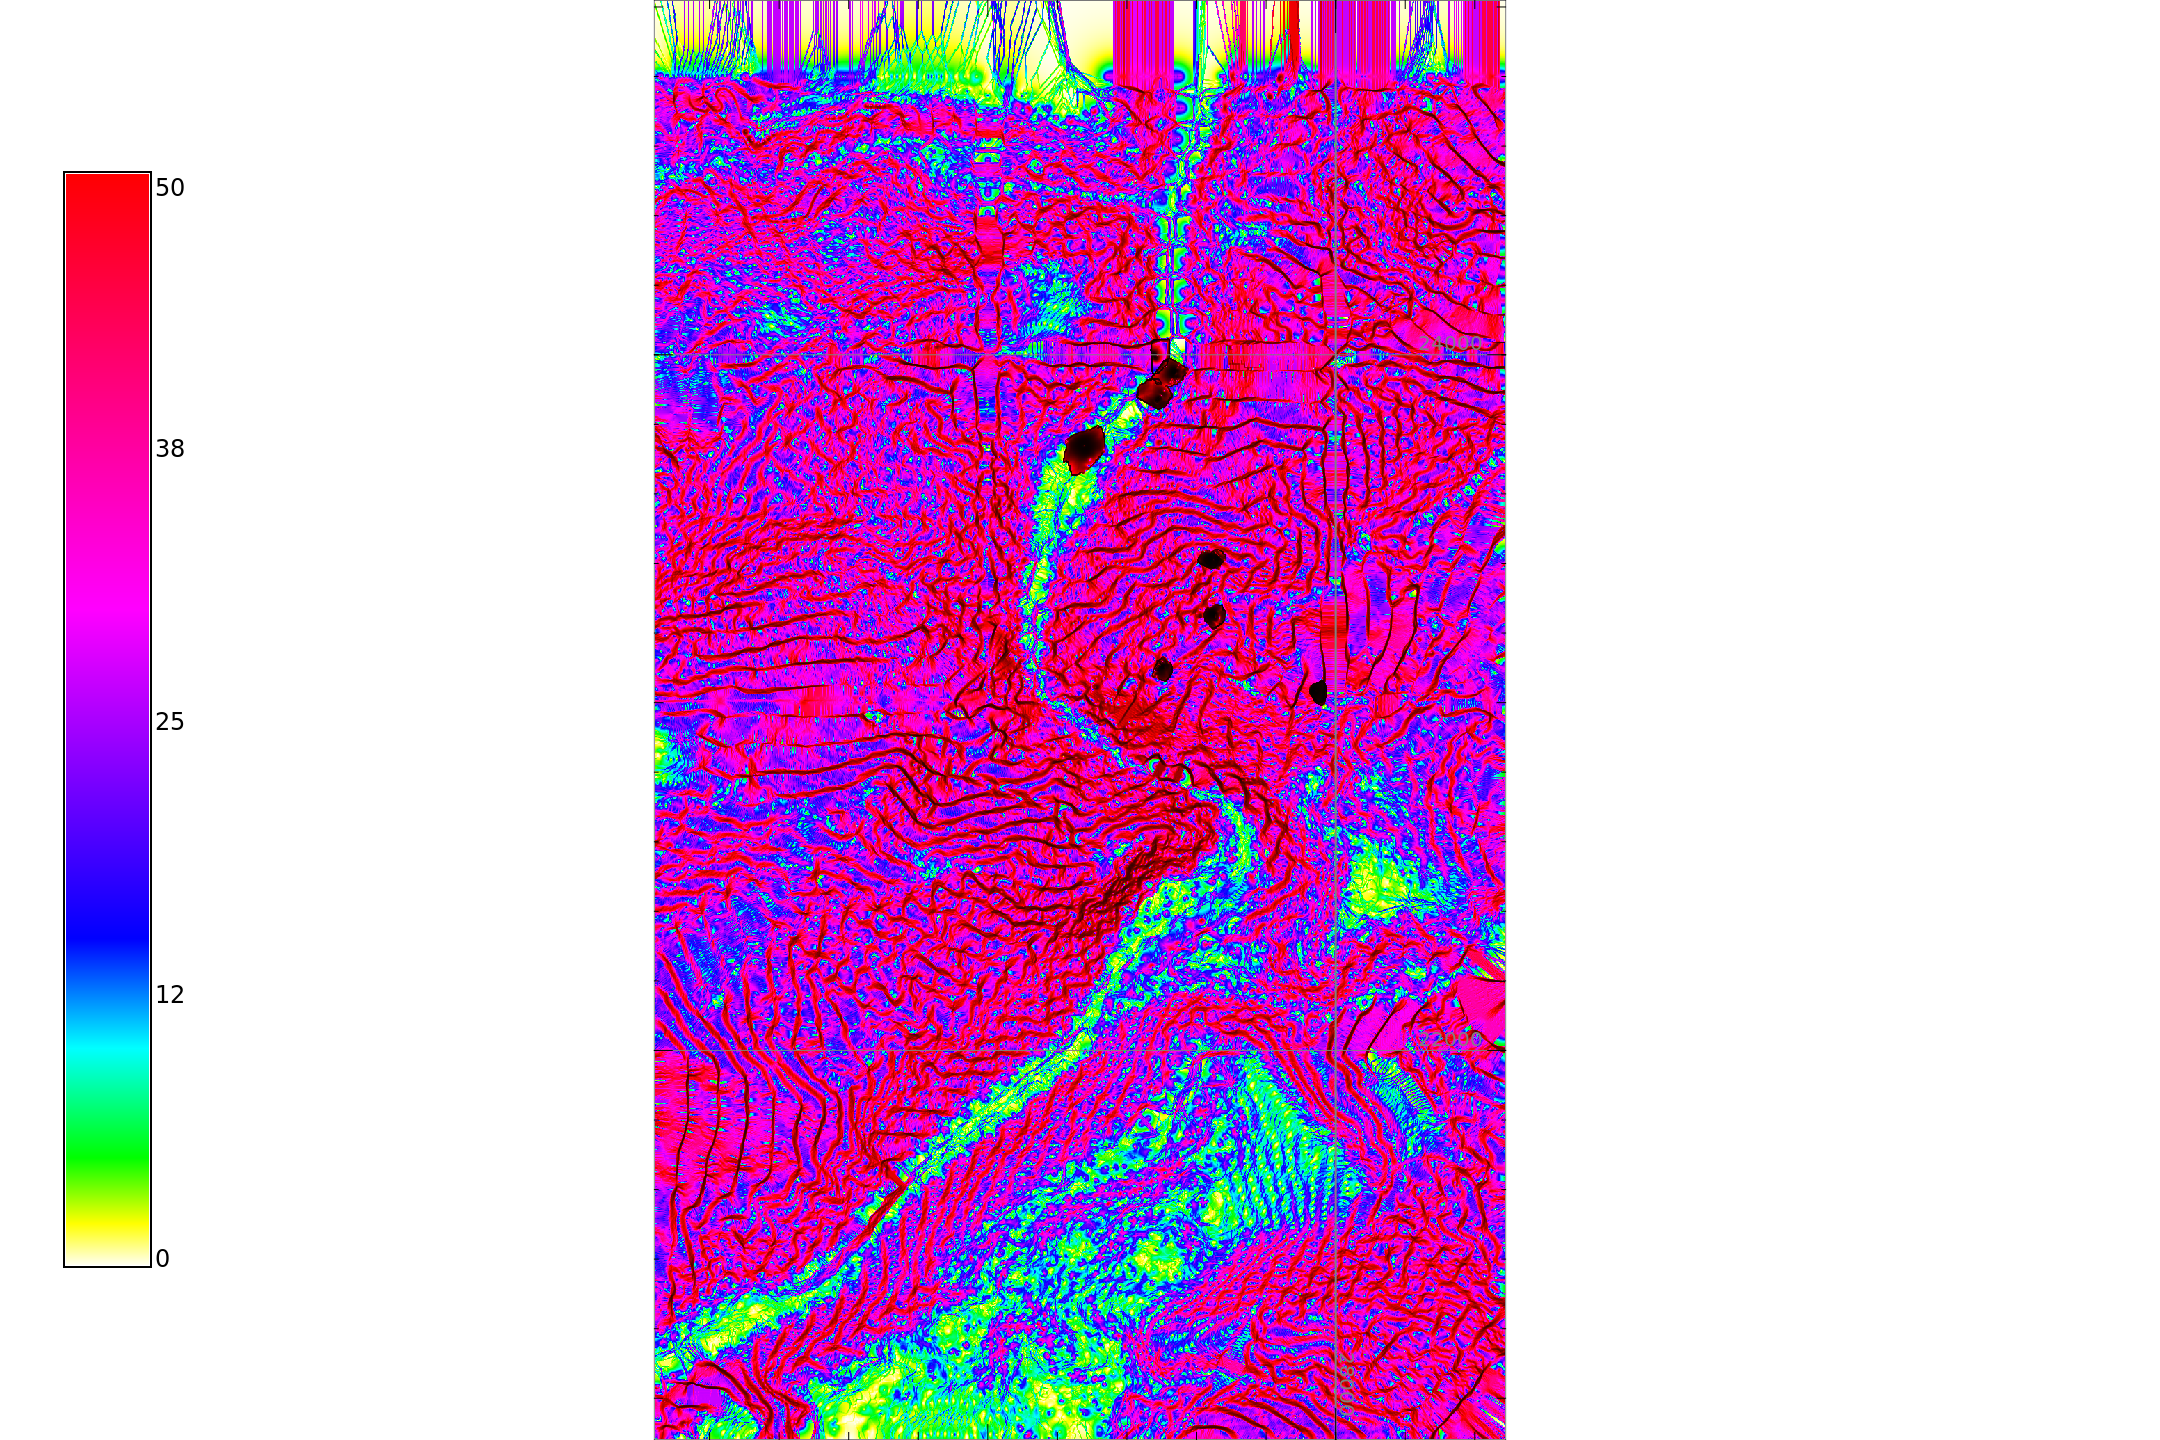

In [19]:
# display hillslope map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_slope.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_slope', bgcolor='white', flags='n')
map.read_grass("d.legend", raster='topog_slope', range='0,50', fontsize='24')[1]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## shaded relief map

In [ ]:
# create a shaded relief map from raster DEM
map.relief_map()



shaded relief map completed


In [ ]:
# display shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_relief.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=4, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_relief', bgcolor='white', flags='n')
# show grid and display result
#map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

In [ ]:
# display shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_relief.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=4, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_relief_color', bgcolor='white', flags='n')
map.read_grass("d.legend", raster='topog_rast_resamp', fontsize='48')[1]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## hydrologic map

In [ ]:
# create a hydrologic map from raster DEM
map.hydrology_map()

In [ ]:
# display hydrologic map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_hydrology.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
# display shaded relief map with watershed basins
map.read_grass('d.his', hue="topog_basin", intensity="topog_relief", brighten="40")[0]
# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=1)
# display streams calculated from accumulation
map.read_grass("d.vect", map='topog_accum_vect', verbose=True, bgcolor='white', 
              color='indigo', width=3)[0]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## project layout map

In [ ]:
# import PNG image with project layout into grass as raster image
map.layout_map(layoutPDF, dbg=0)

In [ ]:
# adjust geolocated map position based on visual inspection
map.read_grass("r.region", map='layout_rast_rgb', verbose=True, 
                     n='n-5',s='s-5')[0]

In [ ]:
# display project layout map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/layout_rast.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='layout_rast_rgb', bgcolor='white', flags='n')
# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=1)
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

In [ ]:
# display project layout on shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/layout_rast2.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
# display shaded relief map with watershed basins
map.read_grass('d.his', hue="layout_rast_rgb", intensity="topog_relief", brighten="40")[0]
# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## larger scale layout maps for siting studies

In [ ]:
# zoom in on Left Bank
n,s,e,w = 24000, 22900, 28100, 27000
g.region(n=n,s=s,e=e,w=w, res=res)

In [ ]:
# display zoomed project layout on shaded relief map 
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/layout_rast2.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=2, width=1080, height=720, overwrite=True)
# display shaded relief map with watershed basins
map.read_grass('d.his', hue="layout_rast_rgb", intensity="topog_relief", brighten="30")[0]

# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=4)
# display Drainage Gallery DG3 alignment
alignment_vect_clean = 'alignment_dg3_cleaned'
map.read_grass('d.vect', map='alignment_dg3_cleaned', color='red', width=5)

# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

In [ ]:
# display zoomed shaded relief map with streams from hydrologic analysis
map.read_grass("d.mon", select='cairo', flags='r')  #release current display monitor
output_image = 'data/out/images/topog_relief.png'
os.environ['GRASS_RENDER_FILE'] = output_image
map.read_grass("d.mon", start='cairo', resolution=4, width=1080, height=720, overwrite=True)
map.read_grass("d.rast", map='topog_relief', bgcolor='white', flags='n')
# display streams calculated from accumulation
map.read_grass("d.vect", map='topog_accum_vect', verbose=True, bgcolor='white', 
              color='indigo', width=3)[0]
# display watershed basin boundaries
map.read_grass('d.vect', map="topog_basin_vect", type="boundary",  width=6)

# display Drainage Gallery DG3 alignment
alignment_vect_clean = 'alignment_dg3_cleaned'
map.read_grass('d.vect', map='alignment_dg3_cleaned', color='red', width=7)

# show grid and display result
map.read_grass("d.grid", size=2000, fontsize=20)[0]
Image(filename = output_image)

## check topography comparing differences between raster results

In [ ]:
!r.mapcalc "topog_vect_rast_=(topog_rast_resamp)-(topog_xyz_rast_resamp)"


In [ ]:
print(map.read_grass("r.univar", map='topog_vect_rast_')[0].decode()) 


In [ ]:
# view and check topography
!rm map.png                                                                                 #ToDo JK: pythonize
#map.read_grass("d.rast", map='topog_vect_rast_', verbose=True, bgcolor='white', flags='n',
#             )[0]
map.read_grass("d.rast", map='topog_vect_rast_', verbose=True, bgcolor='white', flags='n',
              values='(-10)-(10)')[0]

In [ ]:
map.read_grass("d.legend", raster='topog_vect_rast_')[1]
#map.read_grass("d.legend", raster='topog_vect_rast_', range='-10,10')[1]

In [ ]:
Image(filename="map.png")

## extract points from vector data from DXF

In [ ]:
#points_out = map.read_grass("v.to.points", input='topog_vect', output='topog_vect_points') 
#print(points_out[1].decode())

#WARNING: 1565094 features without category in layer <1> skipped. Note that
#         features without category (usually boundaries) are not skipped
#         when 'layer=-1' is given.
# without categories --> seems x,y,z are all missing   !!

points_out = map.read_grass("v.to.points", input='topog_vect', layer=-1, output='topog_vect_points') 
print(points_out[1].decode())

# works (output)

In [ ]:
#print(map.read_grass("v.db.select", map='topog_vect_points', layer=-1)[0].decode()) 


# lots of output, apparently one line for each coordinate ??

In [ ]:
print(map.read_grass("v.info", map='topog_vect_points')[0].decode()) 

In [ ]:
map.read_grass("v.out.ascii", input='topog_vect_points', type='point', layer=-1, separator=',',
              output='data/out/topog_vect_points.csv')

# this works (but includes layers with bad data)
# try with only identified layers with correct contour data   !!

In [ ]:
#print(map.read_grass("g.region", vect='topog_vect_points')[1].decode())  # does not help to display image


In [ ]:
# view and check points
!rm map.png                                                                                 #ToDo JK: pythonize
map.read_grass("d.vect", map='topog_vect_points', color='red')

In [ ]:
Image(filename="map.png")

# no image visible   ??
# image is displayed in qgisp

In [ ]:
map.read_grass("v.to.rast", input='topog_vect_points', use='z', layer=-1, 
             output='topog_vect_points_rast')[0]


In [ ]:
# view and check topography
!rm map.png                                                                                 #ToDo JK: pythonize
map.read_grass("d.rast", map='topog_vect_points_rast')[0]


In [ ]:
Image(filename="map.png")

## extract lines from vector data from DXF

In [ ]:
map.read_grass("v.out.ascii", input='topog_vect', type='line', format='wkt', layer=-1,
              output='data/out/topog_vect_lines.csv')


## convert points to raster data using r.in.xyz

In [ ]:
map.read_grass("r.in.xyz", input='data/out/topog_vect_points.csv', separator=',', zrange='400,2000',
             type='CELL', output='topog_vect_xyz_rast')[1]

# zrange from visual check of original topography


# use also fpr MASK (as first try)
##map.read_grass("r.in.xyz", input='data/out/topog_vect_points.csv', separator=',', zrange='400,2000',
##             type='CELL', output='MASK')[1]

In [ ]:
print(map.read_grass("r.info", map='topog_vect_xyz_rast')[0].decode()) 

In [ ]:
# view and check topography
!rm map.png                                                                                 #ToDo JK: pythonize
map.read_grass("d.rast", map='topog_vect_xyz_rast', verbose=True, bgcolor='red')[1]

In [ ]:
Image(filename="map.png")n